# Drzewa Decyzyjne 🌳

### Drzewa Decyzyjne, uczenie 📓
- klasyfikacja i regresja
- Nie wymagają **skalowania cech!!!**

In [63]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # dlugosc i szerokosc płatka
y = iris.target
print(iris.target_names, "\n", y)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

['setosa' 'versicolor' 'virginica'] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


DecisionTreeClassifier(max_depth=2, random_state=42)

Głębokość drzewa to maksymalna ilość krawędzi w drzewnie od root do liścia 🥬

[Text(0.4, 0.8333333333333334, 'patal length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'patal width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

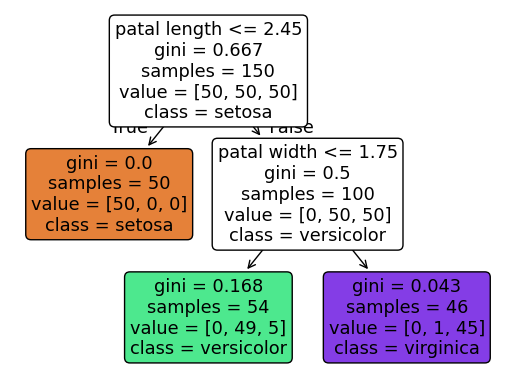

In [64]:
# wydrukowanie tego drzewa
from sklearn.tree import plot_tree
plot_tree(tree_clf, filled=True, rounded=True, feature_names=["patal length", "patal width"], class_names=iris.target_names)


Model ten jest nieparametryczny bo przed uczeniem nie wiemy ile parametrów zostanie wykorzystanych 🐱

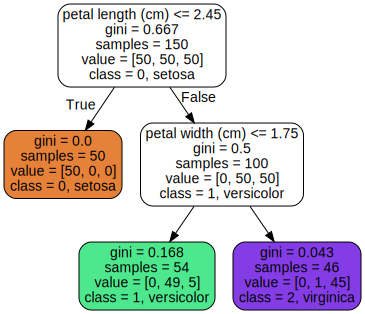

In [65]:
# drugi sposób wyświetlenia drzewa w jupyter
from sklearn.tree import export_graphviz
import graphviz

str_dot = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=[str(num) + ", "+name for num, name in zip(set(iris.target), iris.target_names)],
        rounded=True,
        filled=True
    )
graph = graphviz.Source(str_dot)
graph


In [66]:
# graphviz.render('dot', 'png', f) #renderowanie z pliku .dot do .png

### Drzewa decyzyjne, predykcja

In [67]:
print(tree_clf.classes_)
print(tree_clf.predict([[5.4, 1.7]]))
print(tree_clf.predict_proba([[5.4, 1.7]])) #prawdopodobieństwo dobrego przewidywania

[0 1 2]
[1]
[[0.         0.90740741 0.09259259]]


##### A więc:
- samples - ile instancji ze zbioru uczącego
- values - ile instancji poszczególnych klas

### Zanieczyszczenie Giniego
- mówi o tym jak często losowo wybrany element ze zbioru będzie nieprawidłowo sklasyfikowany, jeśli zostanie losowo oznaczony etykietą według rozkładu etykiet w podzbiorze
- gini - zanieczyszczenie, ile instancji należy do klasy (=0 wszystkie)

  $G_i = 1 - \sum_{k=1}^n p^2_{i,k}$

- im współczynnik giniego (zanieczyszczenie) jest mniejsze tym zbiór jest bardziej czysty 🍽
- $p_{i,k}$ iloraz liczby instancji klasy $k$ w stosunku do liczby instancji w węźle $i$

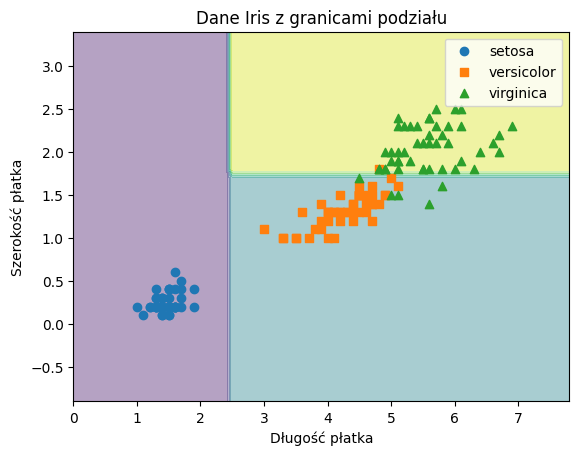

In [68]:
# Wizualizacja działania algorytmu drzewa na naszych danych
import matplotlib.pyplot as plt


markers = ['o', 's', '^'] # koła, kwadraty i trójkąty


# Tworzenie siatki punktów do pokolorowania
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Przewidywanie klas dla punktów siatki
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
for i in range(3):
  plt.scatter(X[y==i, 0], X[y==i, 1], marker=markers[i], label=iris.target_names[i])
plt.legend()

plt.xlabel("Długość płatka")
plt.ylabel("Szerokość płatka")
plt.title("Dane Iris z granicami podziału")
plt.show()

### Drzewo decyzyjne, regresja, dane

In [69]:
import numpy as np
np.random.seed(42)
m=200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

### Drzewo decyzyjne, regresja, uczenie i predykcja

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[0.11063973]


[Text(0.5, 0.8333333333333334, 'x <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'x <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'x <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

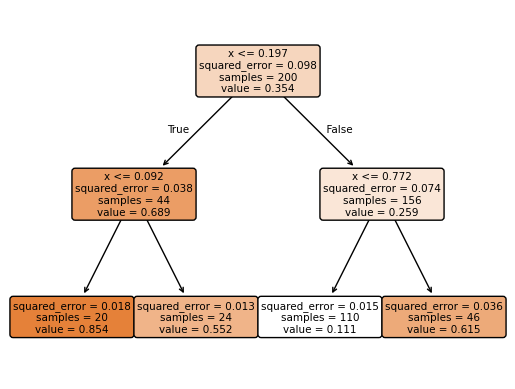

In [71]:
# predykcja
print(tree_reg.predict([[0.6]]))
plot_tree(tree_reg, filled=True, rounded=True, feature_names=["x"])

### Drzewo decyzyjne, regresja, drzewo, głębokość?

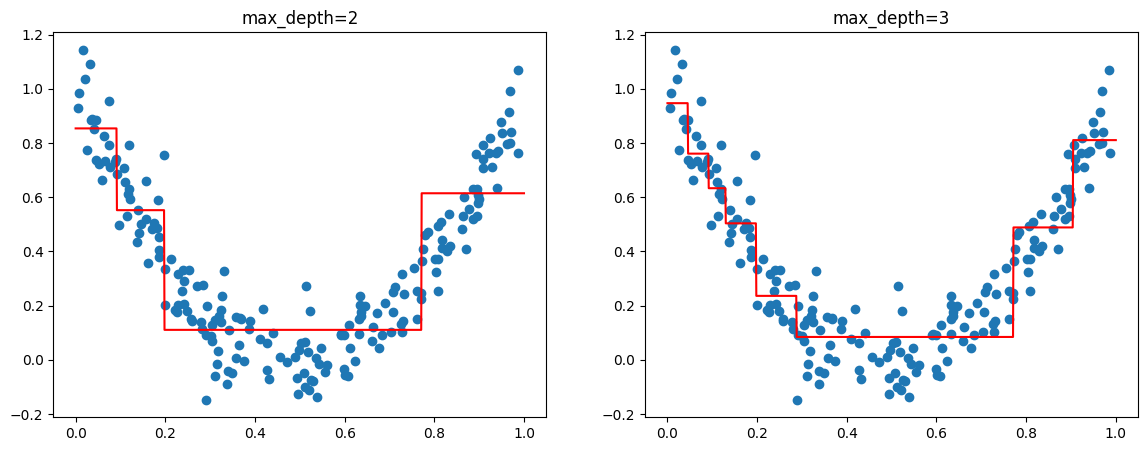

In [72]:
# nowy model o max_depth = 3
tree_reg_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_3.fit(X, y)

xx = np.linspace(0, 1, 1000)

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(X, y)
plt.plot(xx, tree_reg.predict(xx.reshape(-1, 1)), "r")
plt.title("max_depth=2")

plt.subplot(122)
plt.scatter(X, y)
plt.plot(xx, tree_reg_3.predict(xx.reshape(-1, 1)), "r")
plt.title("max_depth=3")
plt.show()

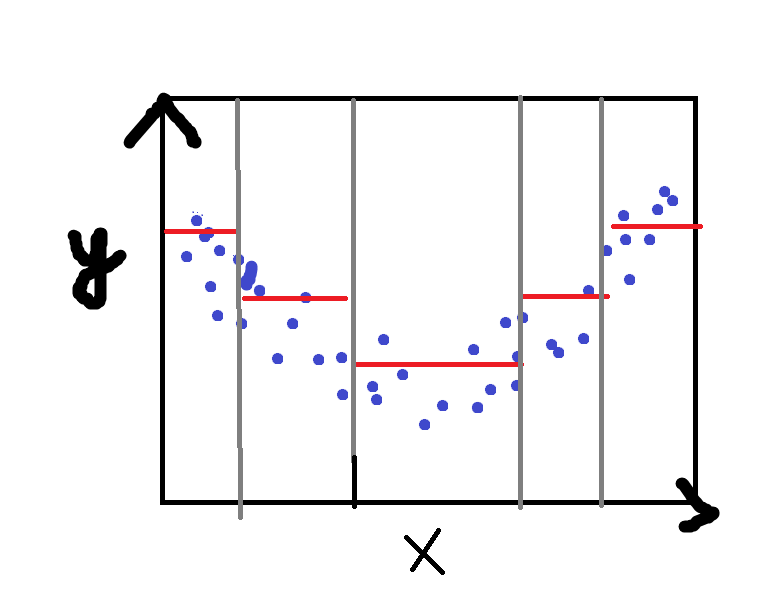

### Drzewa decyzyjne, regersja, hiperparametr - zmiana min_samples_leaf

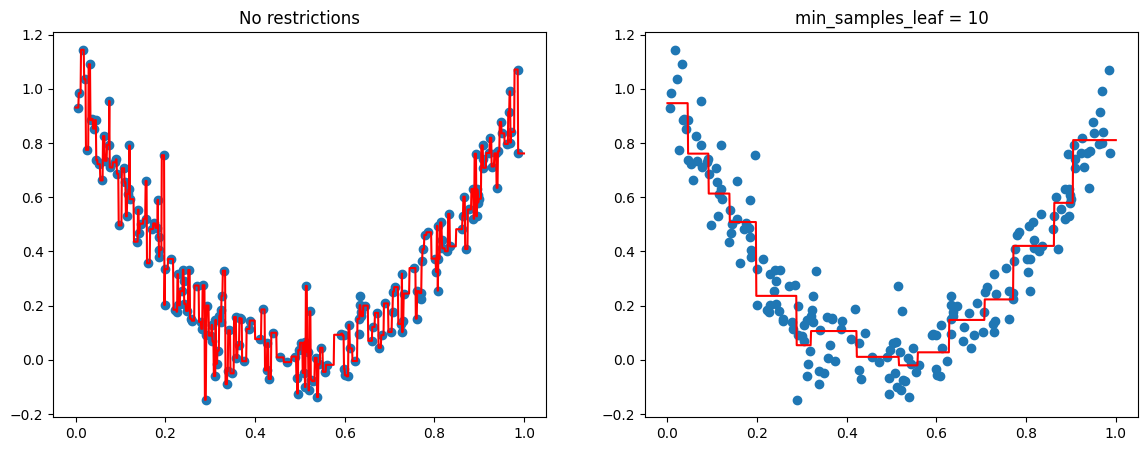

In [73]:
tree_reg_no_min_samples_leaf = DecisionTreeRegressor(random_state=42)
tree_reg_no_min_samples_leaf.fit(X, y)
plt.figure(figsize=(14, 5))

tree_reg_min_samples = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg_min_samples.fit(X, y)

plt.subplot(121)
plt.scatter(X, y)
plt.plot(xx, tree_reg_no_min_samples_leaf.predict(xx.reshape(-1, 1)), "r")
plt.title("No restrictions")

plt.subplot(122)
plt.scatter(X, y)
plt.plot(xx, tree_reg_min_samples.predict(xx.reshape(-1, 1)), "r")
plt.title("min_samples_leaf = 10")
plt.show()

### Drzewa decyzyjne, inne hiperparametry

- Drzewa decyzyjne nie zakładają rodzaju modelu (np. że jest liniowy)
- Skłonność do **overfitting**
- Jest to model *nieparamaetryczny* tzn. ilość parametrów nie jest znana przed rozpoczęciem procesu uczenia; w przewciwieństwie do modelu np. liniowego, gdzie ilość parametrów jest znana (współczynnik równania liniowego)
- *max_depth* - im mniejsza tym bardziej regularny model, mniejsze ryzyko overfittig.
- *min_samples_split* - minimalna liczba instancji, przy których można podzielić węzeł.
- *min_samples_leaf* - minimalna liczba instancji dla liścia
- *min_weigth_fraction_leaf, max_leaf_nodes, max_features*.
- Zwiększanie *min_**, zmniejszanie *max_** $->$ regularyzacja.

### Algorytm CART
- Classification and Regression Tree
- Tworzy drzewo binarne
- Algorytm zachłanny
- Rozwiązanie nie jest optymalne, ale wystarczająco dobre

### Algorytm CART, szczegóły i złożoność
1. Podziel zbiór uczący na dwa, ze względu na pojedynczą ceche $k$ i próg $t_k$,
 - tj, znajdź taką praę $k$ i $t_k$, dla której w/w zbiory będą najczystrze (normalizowane licznością zbioru)
2. Wykonaj rekurencyjnie dalsze podziały na uzyskanych zbiorach, aż do osiągnięcia maksymalnej głębokości lub jeżeli nie będzie można znaleźć najczystrzych zbiorów.
Minimalizowana funkcja celu (kosztu):

  $J(k, t_k)= \frac{m_{lewa}}{m}G_{lewa} + \frac{m_{prawa}}{m}G_{prawa}$
gdzie:
- $G_{lewa/prawa}$ - nieczystość lewego/prawego zbioru
- $m_{lewa/prawa}$ - liczba instancji lewego/prawego zbioru
- m - liczba wszystkich instancji

Dla regresji wybierany jest podział, który minimalizuje MSE

Złożoność algorytmu CART:
- uczenia: $O(n * m * log_2(m))$,   $n$ - liczba cech, $m$ - ilość instancji
- predykcji: $O(log_2(m))$,   $m$ - ilość węzłów drzewa

### Inne algorytmy
- ID3: Iterative Dichotomizer 3.
- C4.5
  - ulepszona wesja ID3
  - bazuje na zysku informacyjnym (Information Gain)

### Regresja drzewa decyzyjne vs KNN, przykład 1

In [74]:
import sklearn.neighbors

# na poprzednich danych tylko dla 10
np.random.seed(42)
m = 10
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Domyślnie bez parametrów
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

#domyślnie dla 5 sąsiadów
knn_reg = sklearn.neighbors.KNeighborsRegressor()
knn_reg.fit(X, y)

KNeighborsRegressor()

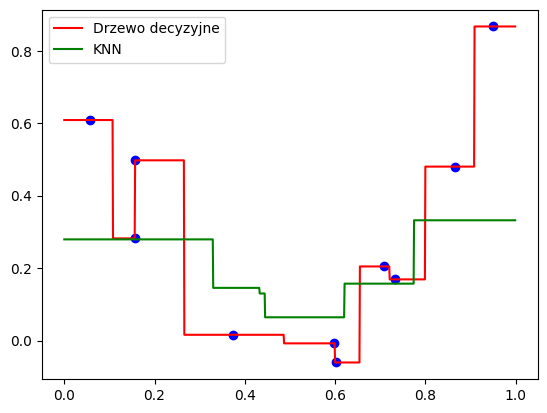

In [75]:
# Wyświetlenie wyników drzewa i knn

plt.scatter(X, y, c="blue")
X_new1 = np.arange(0, 1, 0.001).reshape(-1, 1)
plt.plot(X_new1, tree_reg.predict(X_new1), c="red", label="Drzewo decyzyjne")
plt.plot(X_new1, knn_reg.predict(X_new1), c="green", label="KNN")
plt.legend()
plt.show()